<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2

### A boxplot for "Median value of owner-occupied homes" 

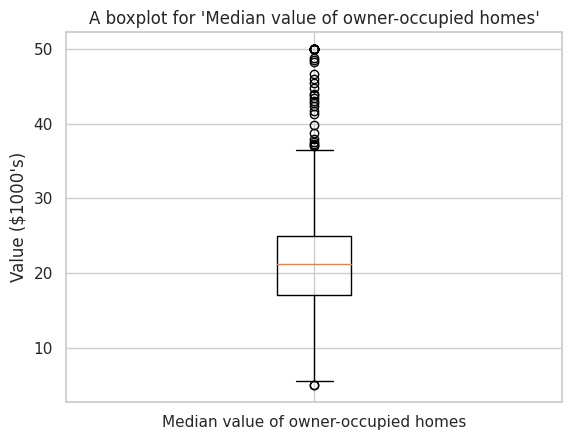

In [29]:
fig, ax = pyplot.subplots()
ax.boxplot(boston_df['MEDV'])
ax.set_xticks([1],['Median value of owner-occupied homes'])
ax.set_ylabel("Value ($1000's)")
ax.set_title("A boxplot for 'Median value of owner-occupied homes'")
pyplot.show()

###  A bar plot for the Charles river variable

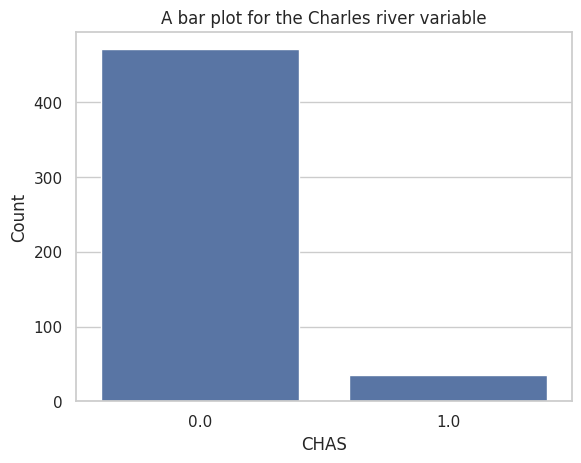

In [24]:
chas_df = boston_df.groupby('CHAS').size()
sns.set(style="whitegrid")
ax = sns.barplot( data=chas_df)
ax.set_ylabel('Count')
ax.set_title("A bar plot for the Charles river variable")
pyplot.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

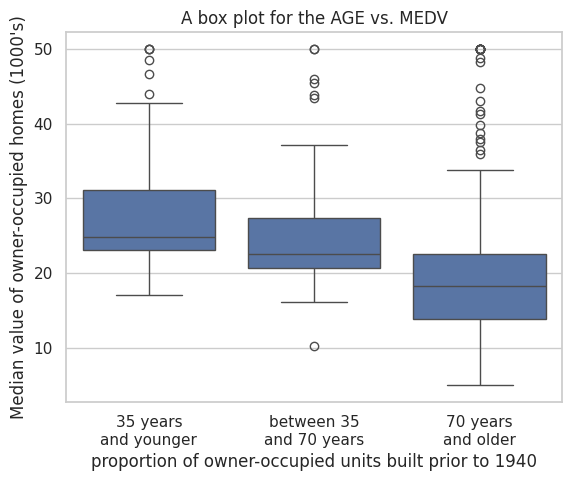

In [47]:
age_group = ['35 years and younger','between 35 and 70 years','70 years and older']
bins = [0, 35, 70, float('inf')]

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=age_group, right=False)


sns.set(style="whitegrid")
ax = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data=boston_df)
ax.set_ylabel("Median value of owner-occupied homes (1000's)")
ax.set_xlabel("proportion of owner-occupied units built prior to 1940")
ax.set_xticks([0,1,2],['35 years\nand younger','between 35\nand 70 years','70 years\nand older'])
ax.set_title("A box plot for the AGE vs. MEDV")
pyplot.show()

In [ ]:
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



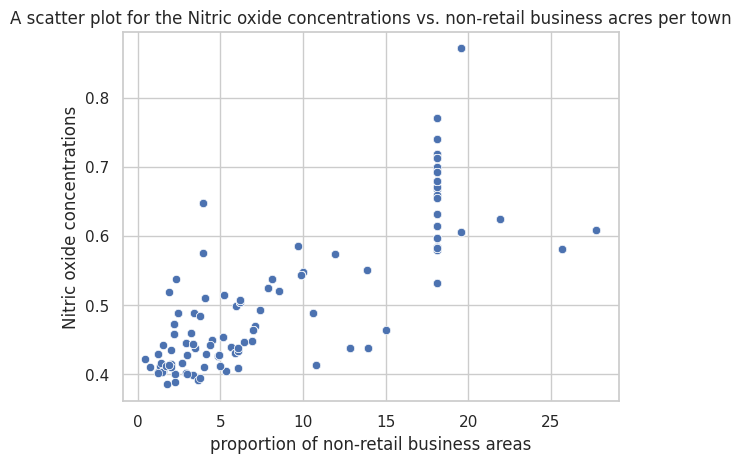

In [37]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data=boston_df)
ax.set_xlabel("proportion of non-retail business areas")
ax.set_ylabel("Nitric oxide concentrations")
ax.set_title("A scatter plot for the Nitric oxide concentrations vs. non-retail business acres per town")
pyplot.show()

#### The Nitric oxide concentrations looks like positively related to the proportion of non-retail business areas per town, expect for when proportion of non-retail busniess areas is 19

Text(0.5, 0, 'pupil-teacher ratio by town')

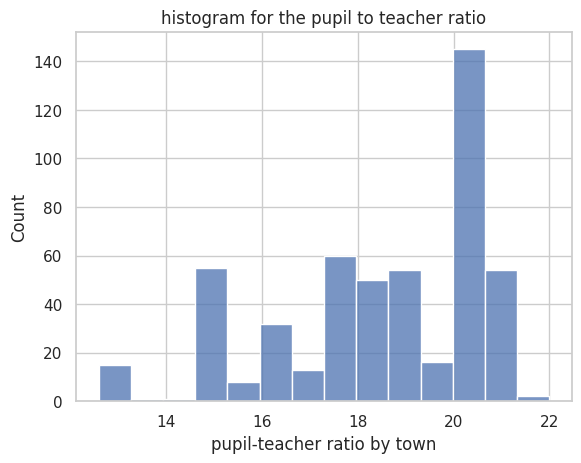

In [39]:
ax = sns.histplot(x = 'PTRATIO', data = boston_df)
ax.set_title('histogram for the pupil to teacher ratio')
ax.set_xlabel('pupil-teacher ratio by town')

## Task 3

### Q: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [41]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [42]:
# since the p-value of Levene test is less than 0.05 we can assume unequality of variance
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

### A: The p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

### Q : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [49]:

scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [50]:
# since the p-value of Levene test is greater than 0.05 we can assume equality of variance
group1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### A:  Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ among these three age groups.

### Q: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [51]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### A: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (positively related).

### Q: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [52]:
lm = ols('MEDV ~ RAD', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
RAD         1.0   6221.140603  6221.140603  85.914278  5.465933e-19
Residual  504.0  36495.154812    72.411021        NaN           NaN


In [53]:

X = boston_df['RAD']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           5.47e-19
Time:                        20:04:17   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### A: p < 0.05 there is evidence of correlation between an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes . Since the correlation coefficient is ~0.379, they are positively correlated.